In [1]:
# import the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import the dataset
df=pd.read_csv("C:\\Users\VIJAY KUMAR\OneDrive\Desktop\python\Startup_Data.csv")

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
# renaming the columns
df.rename(columns={"Date dd/mm/yyyy":"Date"}, inplace=True)

In [5]:
# data
df[:1]

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [6]:
# adjust the space between the City  Location with the help of rename function
df.rename(columns={"City  Location":"City location"},inplace=True)

In [7]:
df[:1]

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [8]:
df.shape

(3044, 10)

In [9]:
df.drop(["Sr No","Remarks"], axis=1 , inplace=True)

In [10]:
df.shape

(3044, 8)

In [11]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD
0,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [12]:
df.Date.dtypes

dtype('O')

In [13]:
df.Date.isnull().sum()

0

In [14]:
df["Date"]=df["Date"].str.replace("05/072018","05/07/2018")

In [15]:
# converting into datetime
df["Date"]= pd.to_datetime(df["Date"], format= "%d-%m-%Y" , dayfirst=True, errors="coerce")

In [16]:
df.Date.isnull().sum()

8

In [17]:
df.Date.dtype

dtype('<M8[ns]')

In [18]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [19]:
# removing the null value
df.dropna(subset=["Date"], axis=0 , inplace=True)

In [20]:
# dayCreating year,month,
df["Year"]=df["Date"].dt.year.astype(int)
df["Month"]=df["Date"].dt.month.astype(int)
df["Day"]=df["Date"].dt.day.astype(int)


In [21]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Day
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",2020,1,9


In [22]:
df.shape

(3036, 11)

In [23]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Day
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",2020,1,9


In [24]:
# datatype
df["Amount in USD"].dtype


dtype('O')

In [25]:
# null values
df["Amount in USD"].isnull().sum()

959

In [26]:
# imputation
df["Amount in USD"]=df["Amount in USD"].str.replace(r"[^\d]","",regex=True)

In [27]:
# passing
df["Amount in USD"]=pd.to_numeric(df["Amount in USD"],errors="coerce")

In [28]:
# sum the values
df["Amount in USD"].sum()

48604197456.0

In [29]:
# null values
df["Amount in USD"].isnull().sum()

966

In [30]:
# imputation
df["Amount in USD"]=df["Amount in USD"].fillna(df["Amount in USD"].mean())

In [31]:
# sum values
df["Amount in USD"].sum()

71286156268.79999

In [32]:
# output
round(df["Amount in USD"].sum())

71286156269

In [33]:
df["Amount in USD"]=df["Amount in USD"].astype("int64")

In [34]:
df["Amount in USD"].dtype

dtype('int64')

In [35]:
# handling the city location column
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Day
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020,1,9


In [36]:
# imputation
df["Startup Name"]=df["Startup Name"].str.replace(r"\\+" , "", regex=True)

In [37]:
df.groupby("Startup Name")["Amount in USD"].sum()

Startup Name
"BYJU'S"           150000000
#Fame               10000000
121Policy           23480288
19th mile             180000
1Crowd              23480288
                     ...    
xc2xa0Notesgen            20
xc2xa0Nudgespot       625000
xc2xa0Satvacart           20
xc2xa0Shopsity            20
zippserv              440000
Name: Amount in USD, Length: 2453, dtype: int64

In [38]:
# handling startup name
df["Startup Name"]=df["Startup Name"].str.replace("xa0" , "", regex=False)
df["Startup Name"]=df["Startup Name"].str.replace("xc2" , "", regex=False)
df["Startup Name"]=df["Startup Name"].str.replace("\xa0" , "", regex=False)



In [39]:
df.groupby("Startup Name")["Amount in USD"].sum()

Startup Name
"BYJU'S"             150000000
#Fame                 10000000
121Policy             23480288
19th mile               180000
1Crowd                23480288
                       ...    
vImmune               23480288
vPhrase Analytics     23480288
wWhere                  200000
wayForward             1000000
zippserv                440000
Name: Amount in USD, Length: 2451, dtype: int64

In [40]:
# imputation
df["City location"]=df["City location"].str.replace(r"\\+" , "", regex=True)

In [41]:
df.groupby("City location")["Amount in USD"].sum()

City location
Agra                 46960576
Ahemadabad            6344811
Ahemdabad            23480288
Ahmedabad           371919168
Amritsar               300000
                      ...    
xc2xa0Bangalore    2016200000
xc2xa0Gurgaon       225685040
xc2xa0Mumbai       2019350000
xc2xa0New Delhi    2010000020
xc2xa0Noida        2020000000
Name: Amount in USD, Length: 112, dtype: int64

In [42]:
# handling city location
df["City location"]=df["City location"].str.replace("xa0" , "", regex=False)

df["City location"]=df["City location"].str.replace("xc2" , "", regex=False)

df["City location"]=df["City location"].str.replace("\xa0" , "", regex=False)




In [43]:
df.groupby("City location")["Amount in USD"].sum()

City location
Agra              46960576
Ahemadabad         6344811
Ahemdabad         23480288
Ahmedabad        371919168
Amritsar            300000
                   ...    
Udaipur           23980288
Udupi             35480288
Uttar Pradesh     23480288
Vadodara         100695152
Varanasi             52000
Name: Amount in USD, Length: 107, dtype: int64

In [44]:
# imputation
df["Investors Name"]=df["Investors Name"].str.replace(r"\\+" , "", regex=True)

In [45]:
df.groupby("Investors Name")["Amount in USD"].sum()

Investors Name
"Kedaraa Capital, Ontario Teachers'"                                   19500000
021 Capita, Binny Bansal                                                3000000
1Crowd                                                                  1000000
1Crowd (through crowd funding)                                           200000
1Crowd (through crowdfunding)                                            209000
                                                                        ...    
xc2xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group    2016200000
xc2xa0LetsVenture, Kumar Bansal, Kshitij Jain                          20685000
xc2xa0Palaash Ventures                                                       20
xc2xa0Rajeev Saraf, Arvind Jha, R. Satya Narayanan                           20
xc2xa0Tiger Global                                                   2020000000
Name: Amount in USD, Length: 2406, dtype: int64

In [46]:
# imputation
df["Investors Name"]=df["Investors Name"].str.replace("xa0" , "", regex=False)
df["Investors Name"]=df["Investors Name"].str.replace("xc2" , "", regex=False)
df["Investors Name"]=df["Investors Name"].str.replace("\xa0" , "", regex=False)

In [47]:
df.groupby("Investors Name")["Amount in USD"].sum()

Investors Name
 Sandeep Aggarwal, Teruhide Sato                    20
"Kedaraa Capital, Ontario Teachers'"          19500000
021 Capita, Binny Bansal                       3000000
1Crowd                                         1000000
1Crowd (through crowd funding)                  200000
                                                ...   
ru-Net, Sequoia Capital, Lightbox Ventures    30000000
undisclosed investor                           1525000
undisclosed investors                          8390000
undisclosed private investors                   500000
vCommission                                     289000
Name: Amount in USD, Length: 2403, dtype: int64

In [48]:
df["City location"].mode()

0    Bangalore
Name: City location, dtype: object

In [49]:
df["City location"]=df["City location"].replace(["Ahemadabad","Ahmedabad"],"Ahemdabad")

In [50]:
df.groupby("City location")["Amount in USD"].sum()

City location
Agra                46960576
Ahemdabad          401744267
Amritsar              300000
Andheri              5750000
Bangalore        19083498112
                    ...     
Udaipur             23980288
Udupi               35480288
Uttar Pradesh       23480288
Vadodara           100695152
Varanasi               52000
Name: Amount in USD, Length: 105, dtype: int64

In [51]:
# indentify the top 10 fund cities
top_c=df.groupby("City location")["Amount in USD"].sum().sort_values(ascending=False).head(10)

In [52]:
top_c

City location
Bangalore    19083498112
Mumbai       10828882823
New Delhi     9254268735
Bengaluru     8937485287
Gurgaon       5804834385
Noida         4151634656
Pune          1431411792
Chennai       1235333336
Hyderabad     1035044006
Gurugram      1030294539
Name: Amount in USD, dtype: int64

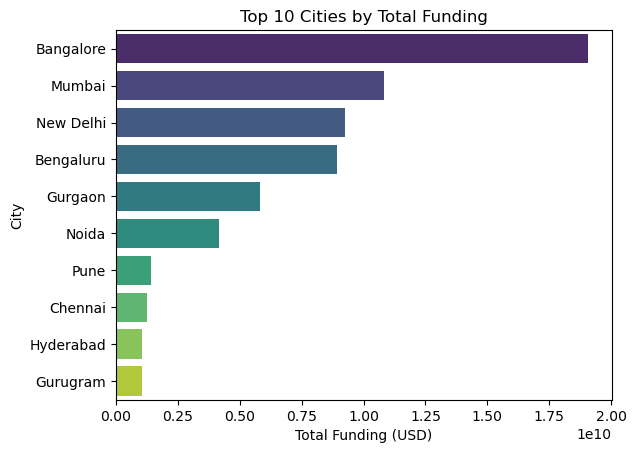

In [53]:
sns.barplot(x=top_c.values , y=top_c.index , palette="viridis")
plt.title("Top 10 Cities by Total Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("City")
plt.show()

In [54]:
# most common industries
top_In=df["Industry Vertical"].value_counts().head(10)


In [55]:
top_In

Industry Vertical
Consumer Internet    940
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: count, dtype: int64

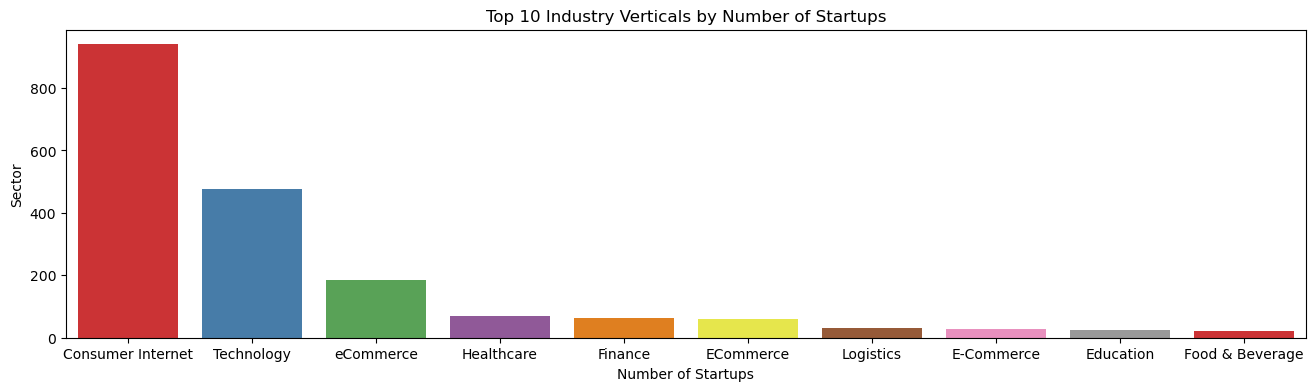

In [56]:
plt.figure(figsize=(16,4))
sns.barplot(x=top_In.index,y=top_In.values, palette="Set1")
plt.title("Top 10 Industry Verticals by Number of Startups")
plt.xlabel("Number of Startups")
plt.ylabel("Sector")
plt.show()

In [57]:
# indentify the top 10 
top_fund=df.groupby("SubVertical")["Amount in USD"].sum().sort_values(ascending=False).head(10)

In [58]:
top_fund

SubVertical
Bike Taxi                             3900000000
Online Marketplace                    2648700000
ECommerce Marketplace                 1700000000
E-Books                               1510950000
Mobile Wallet & ECommerce platform    1460000000
Mobile Wallet                         1057000000
Private Equity Firm                    600000000
Business development                   585000000
Hospitality                            488997554
Wearable Fitness Bands                 450000000
Name: Amount in USD, dtype: int64

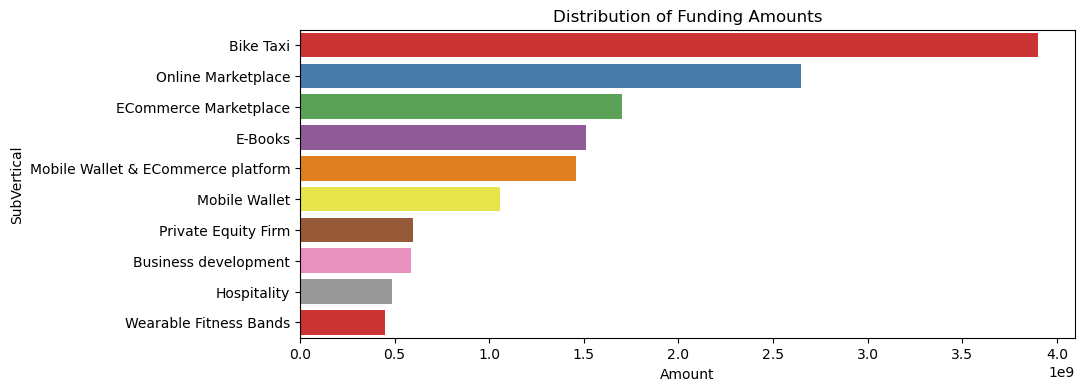

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(x=top_fund.values,y=top_fund.index , palette="Set1" )
plt.xlabel("Amount")
plt.title("Distribution of Funding Amounts")
plt.show()

In [60]:
funding_by_year = df.groupby("Month")["Amount in USD"].sum().reset_index()


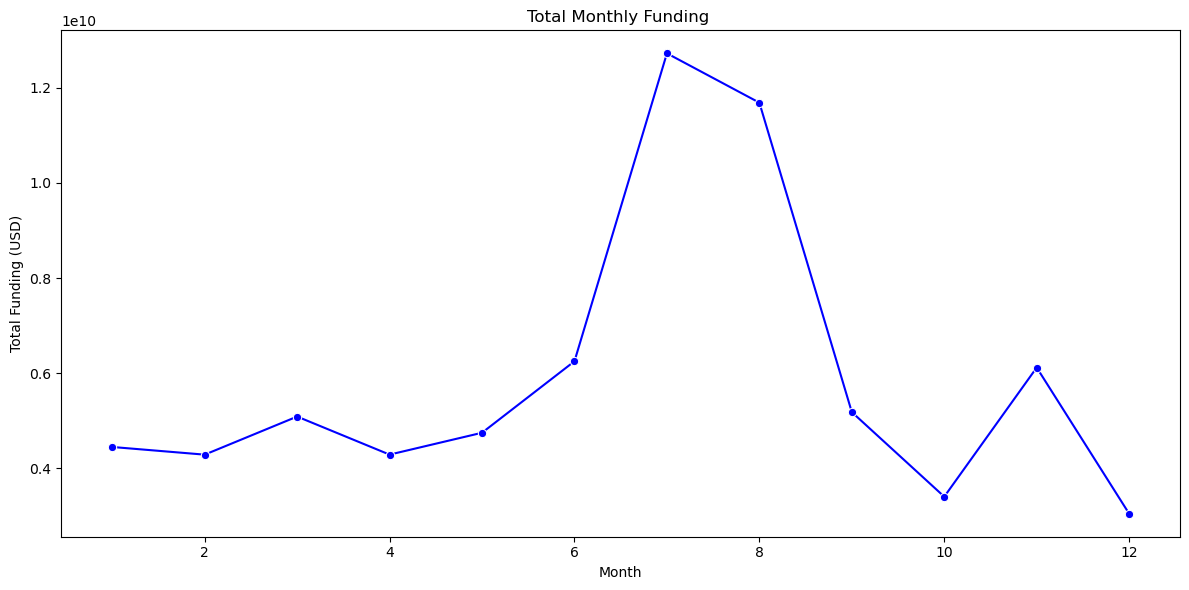

In [61]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_by_year, x="Month", y="Amount in USD", marker='o', color='blue')
plt.title("Total Monthly Funding ")
plt.xlabel("Month")
plt.ylabel("Total Funding (USD)")
plt.tight_layout()
plt.show()

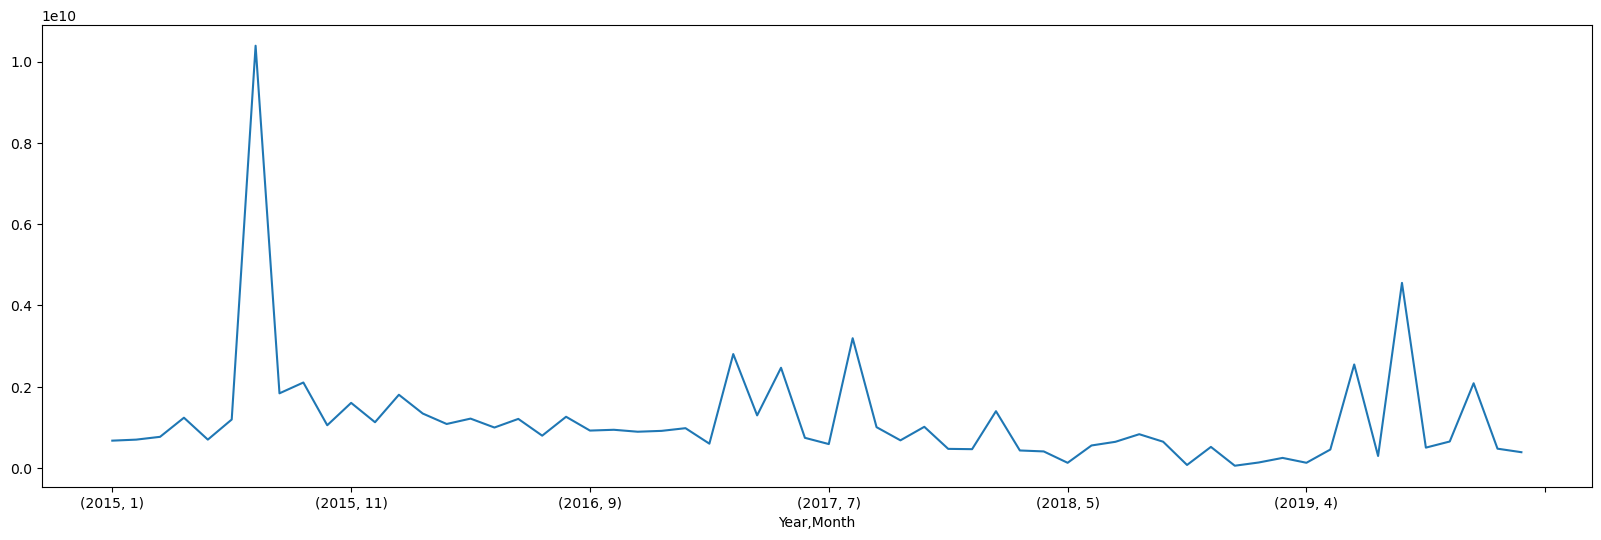

In [62]:
plt.figure(figsize=(20, 6))
monthly_funding = df.groupby(["Year","Month"])["Amount in USD"].sum()
monthly_funding.plot(kind="line")
plt.show()

In [63]:
# indentify the top investor
top_investors = df["Investors Name"].value_counts().head(10).reset_index()

In [64]:
top_investors

,Investors Name,count
0,Undisclosed Investors,39
1,Undisclosed investors,30
2,Ratan Tata,25
3,Indian Angel Network,23
4,Kalaari Capital,16
5,Sequoia Capital,15
6,Group of Angel Investors,14
7,Undisclosed Investor,12
8,Accel Partners,12
9,undisclosed investors,11


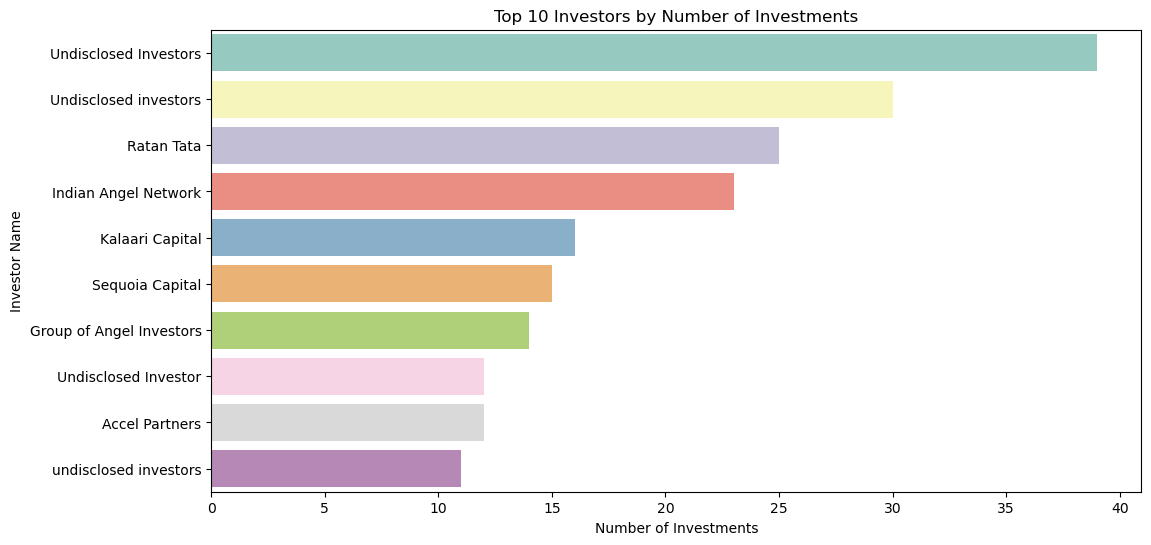

In [65]:
plt.figure(figsize=(12,6))
top_investors.columns = ["Investor", "Count"]
sns.barplot(x="Count", y="Investor", data=top_investors,  palette="Set3")
plt.title("Top 10 Investors by Number of Investments")
plt.xlabel("Number of Investments")
plt.ylabel("Investor Name")
plt.show()

In [66]:
top_startup=df.groupby("Startup Name")["Amount in USD"].sum().sort_values(ascending=False).head(10)

In [67]:
top_startup

Startup Name
Flipkart            4059700000
Rapido Bike Taxi    3900000000
Paytm               3195910576
News in shorts      2020000000
Loylty Rewards      2019350000
Bluestone           2016200000
Mamagoto            2010000000
Pratilipi           1515250000
Ola                  984500000
Udaan                870000000
Name: Amount in USD, dtype: int64

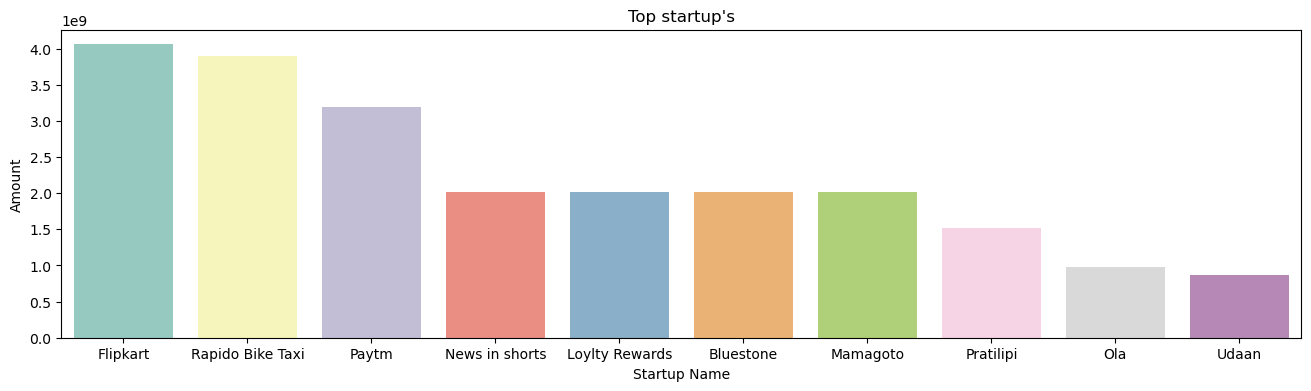

In [68]:
plt.figure(figsize=(16,4))
sns.barplot(x=top_startup.index,y=top_startup.values, palette="Set3")
plt.ylabel("Amount")
plt.title("Top startup's")
plt.show()

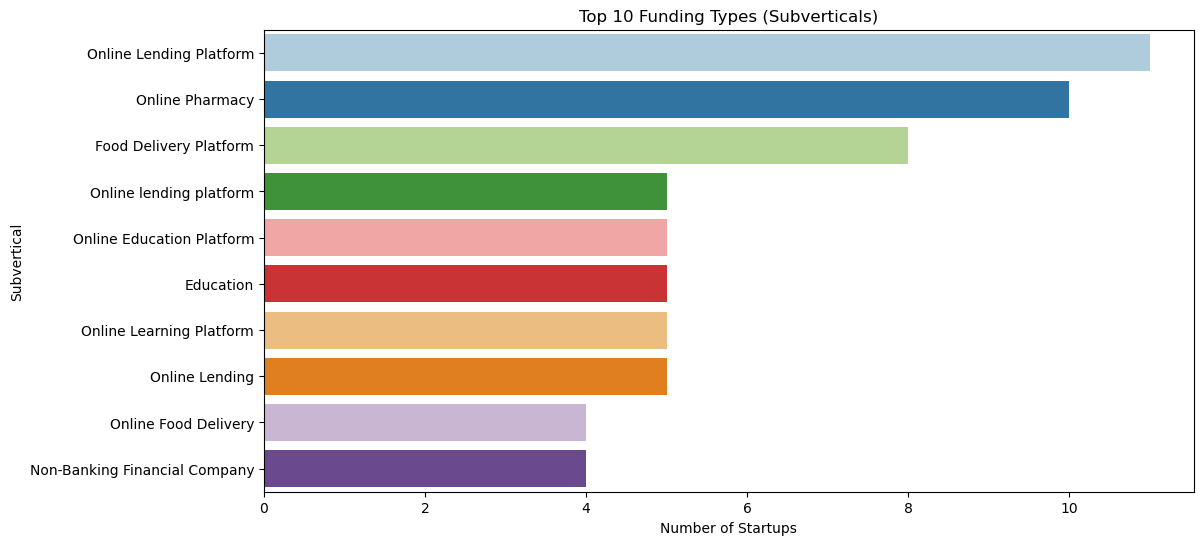

In [69]:
# plotting
plt.figure(figsize=(12,6))
top_types = df['SubVertical'].value_counts().head(10).reset_index()
top_types.columns = ["SubVertical", "Count"]
sns.barplot(x="Count", y="SubVertical", data=top_types, palette="Paired")
plt.title("Top 10 Funding Types (Subverticals)")
plt.xlabel("Number of Startups")
plt.ylabel("Subvertical")
plt.show()

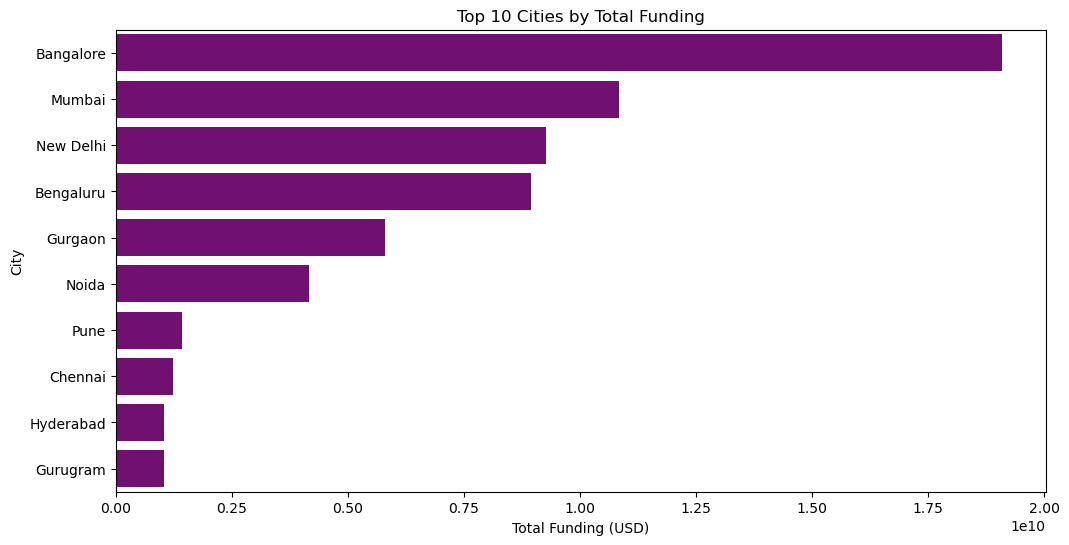

In [70]:
plt.figure(figsize=(12,6))
city_funding = df.groupby("City location")["Amount in USD"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x="Amount in USD", y="City location", data=city_funding, color='purple')
plt.title("Top 10 Cities by Total Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("City")
plt.show()

In [71]:
most_active = df["Investors Name"].value_counts().idxmax()
print("Most Active Investor:",most_active)


Most Active Investor: Undisclosed Investors


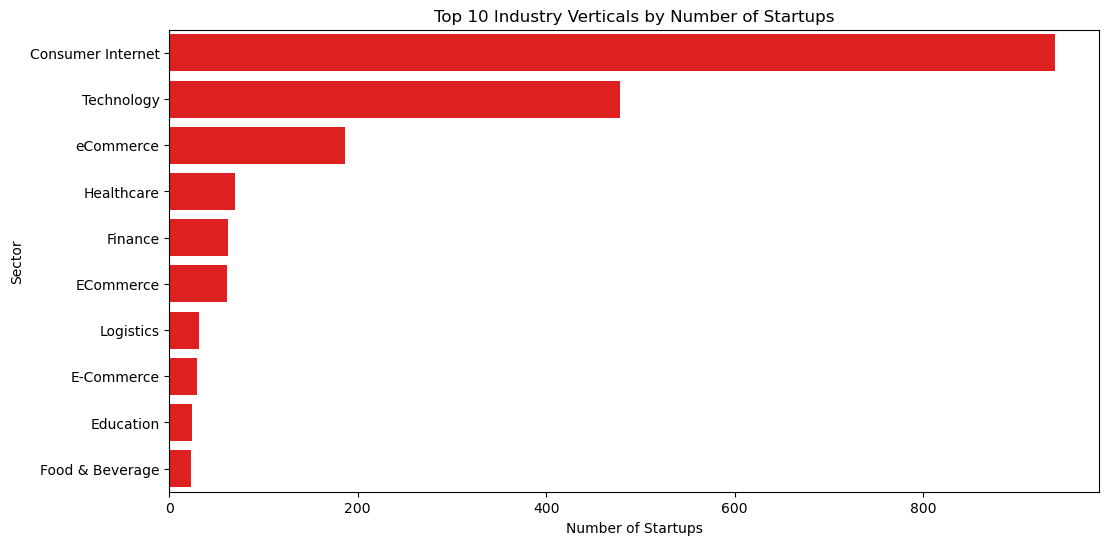

In [72]:
plt.figure(figsize=(12,6))
sector_count = df["Industry Vertical"].value_counts().head(10).reset_index()
sector_count.columns = ["Sector", "Count"]
sns.barplot(x="Count", y="Sector", data=sector_count, color='red')
plt.title("Top 10 Industry Verticals by Number of Startups")
plt.xlabel("Number of Startups")
plt.ylabel("Sector")
plt.show()

In [73]:
funding_by_year = df.groupby("Year")["Amount in USD"].sum().reset_index()


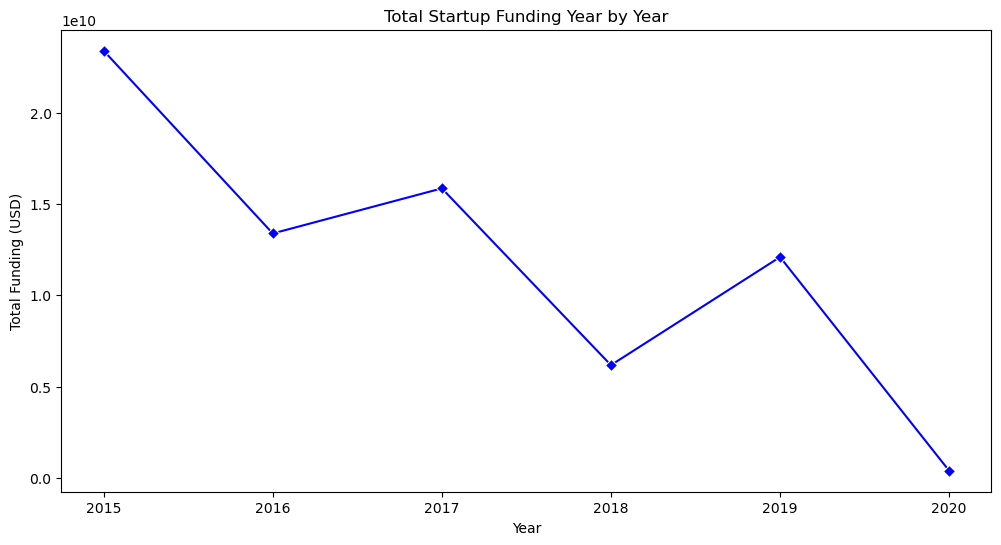

In [74]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_by_year, x="Year", y="Amount in USD", marker="D", color="blue")
plt.title("Total Startup Funding Year by Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.show()

In [75]:
print(" City with the Most Funding: ", top_c.index[0])
print(" Sector Dominating Rounds: ", df['Industry Vertical'].mode()[0])
print(" Year-wise Funding Trend:")
yearly_funding = df.groupby(df['Date'].dt.year)['Amount in USD'].sum().reset_index()
display(yearly_funding)

 City with the Most Funding:  Bangalore
 Sector Dominating Rounds:  Consumer Internet
 Year-wise Funding Trend:


,Date,Amount in USD
0,2015,23392482224
1,2016,13384565824
2,2017,15853256258
3,2018,6172731329
4,2019,12092912775
5,2020,390207254


In [77]:
df.to_csv("cleaned startup_project", index = False)